### Ultimate Part 1 - Exploratory Data Analysis

In [35]:
import pandas as pd
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
df = pd.read_json("logins.json")

In [37]:
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [38]:
df.describe()
## Appears to be duplicated or miraculously logins are occuring on the same second of the day.

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [40]:
dupes = df[df.duplicated(keep='first')]

In [41]:
dupes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 354 to 93022
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  877 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.7 KB


In [42]:
df.set_index('login_time',inplace=True)

In [43]:
df['count'] = 1

In [47]:
timeSeries = df.resample('15T').agg({'count':'sum'})

In [49]:
timeSeries

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [59]:
import seaborn as sns

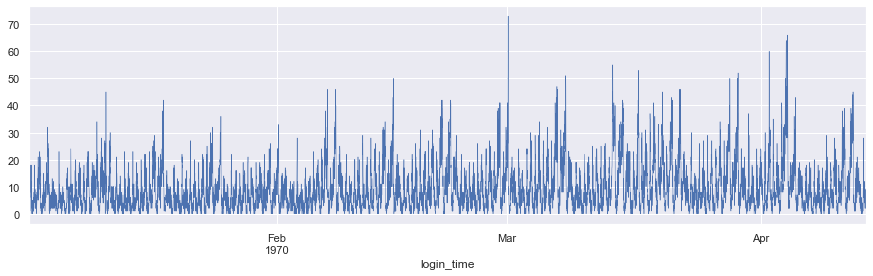

In [62]:
sns.set(rc={'figure.figsize':(15,4)})

timeSeries['count'].plot(linewidth=0.5)

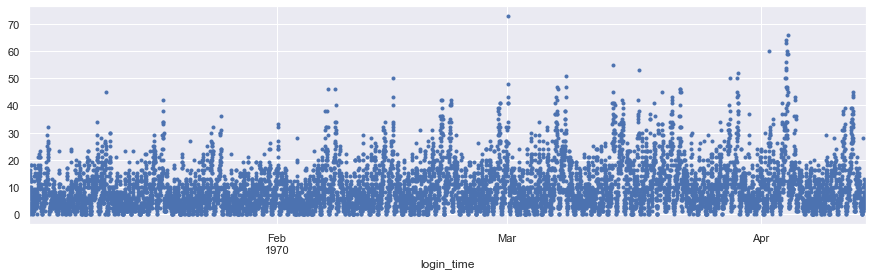

In [63]:
###  Looks like some cyclicity going on... weekly perhaps?
timeSeries['count'].plot(marker = '.', linestyle = 'None')

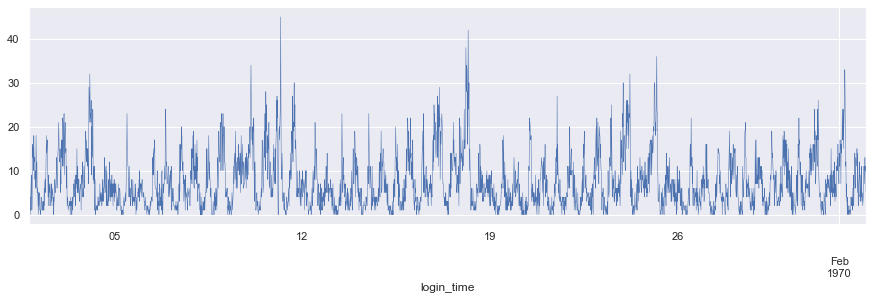

In [70]:
# That's no help.  yuk.  Let's try a smaller window  ... a month maybe.

timeSeries.loc['1970-01-01':'1970-02-01', 'count'].plot(linewidth=0.5)

# you can see cyclicity by nothing jumps out.  It should be noted that 05, 12, 19 and 26 are MONDAYS!
# It appears there is more activity on the weekends than during the week.

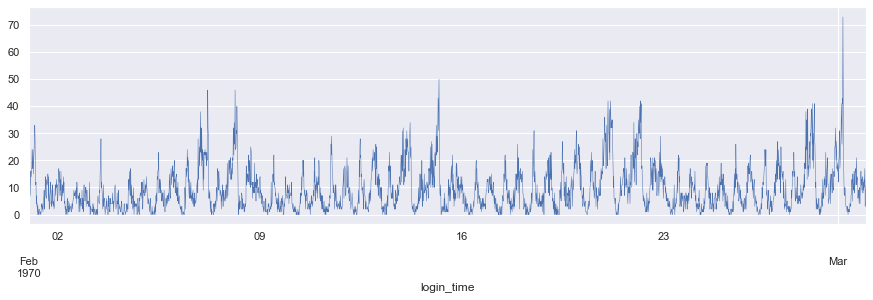

In [73]:
timeSeries.loc['1970-02-01':'1970-03-01', 'count'].plot(linewidth=0.5)

# you can see cyclicity by nothing jumps out.  It should be noted that 02, 09, 16, 23 are MONDAYS!
# Obvious drop offs on Monday through January and February

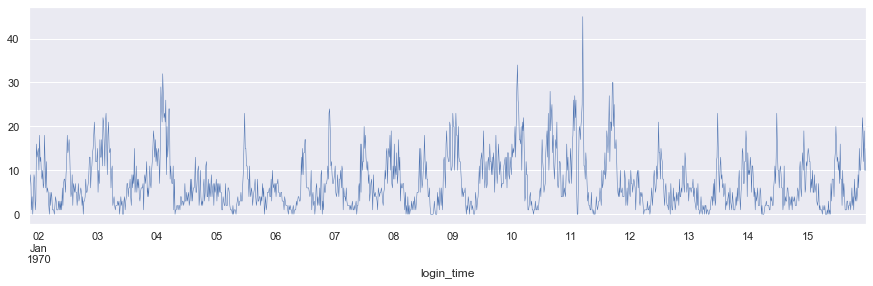

In [69]:
# two weeks worth to see a bit more detail in the cycles
timeSeries.loc['1970-01-01':'1970-01-15', 'count'].plot(linewidth=0.5)

# Still seeing the increased traffic on weekends (Friday through Sunday) with a down day on Monday

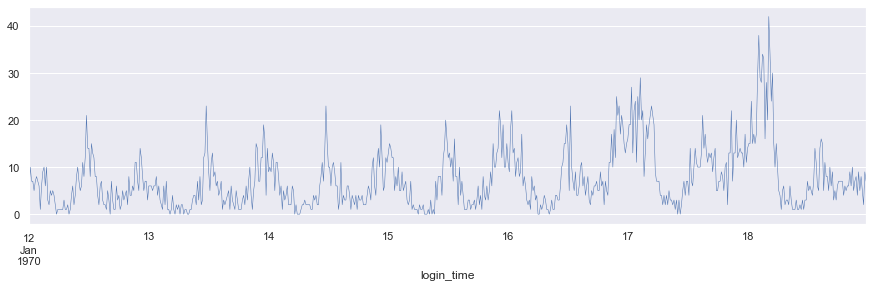

In [72]:
# let's check one week...
timeSeries.loc['1970-01-12':'1970-01-18', 'count'].plot(linewidth=0.5)

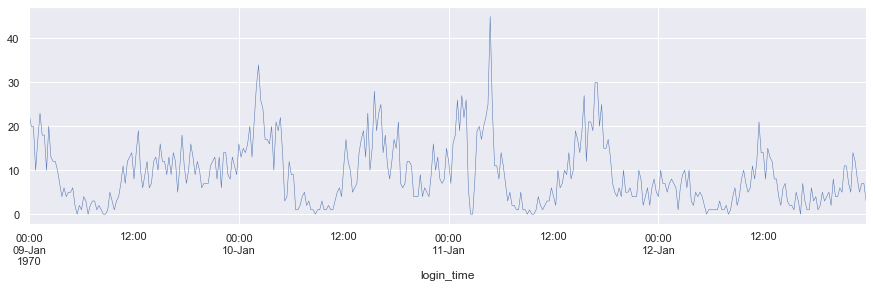

In [71]:
# lets check out the second weekend the 9 (Friday)  through 12(Monday)
timeSeries.loc['1970-01-09':'1970-01-12', 'count'].plot(linewidth=0.5)

## There appears to be two surges everyday,  Early afternoon and early morning typically after midnight.

####  It is obvious there are cycles in this data.

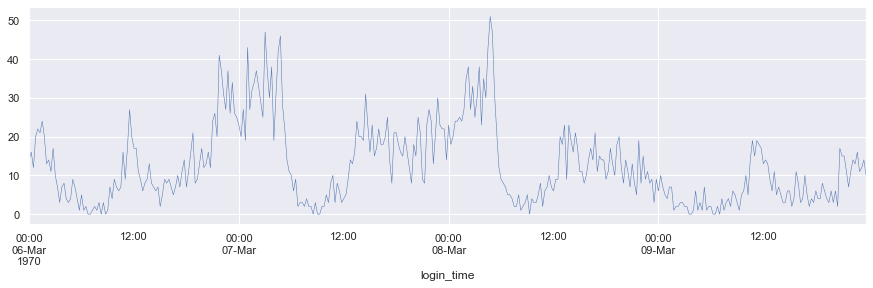

In [74]:
# lets check out the second weekend the 6 (Friday)  through 9(Monday) of March
timeSeries.loc['1970-03-06':'1970-03-09', 'count'].plot(linewidth=0.5)

In [ ]:
# The pattern over the weekend into Monday holds.  It looks like gamers on late night binges - 
# no school or work the next days have the largest activity spikes.  Monday appears to be a recovery day.